In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Investigate Parameters of Steady-State

In [3]:
stats_investigate_df = pd.read_csv("results/investigate_parameters_results.csv")

#show best paramaters for highest steady-state rate
stats_investigate_df = stats_investigate_df[stats_investigate_df['steady_rate'].lt(0.99) & 
                     stats_investigate_df['steady_rate'].gt(0.01) & 
                     stats_investigate_df['agree_rate'].gt(0.995)]
stats_investigate_df.sort_values("steady_rate", ascending=False).head(10)

,num_states,num_last_iterations,pct_steady_range,margin,agree_rate,steady_rate
7,300,50,20,5,0.996444,0.094222
9,200,50,20,5,0.995556,0.093333
0,400,100,20,5,0.999111,0.089778
5,300,100,20,5,0.997333,0.089778
3,200,100,20,5,0.998222,0.088889
6,300,100,15,5,0.996444,0.079111
11,200,50,12,5,0.995556,0.069333


***

# Investigate Simulations

In [4]:
simulations_results_df = pd.read_csv("results/full_simulations_results.csv")

#### Base Model

Text(0.5, 1.0, 'Fraction of runs with steady state per p anf f parameters')

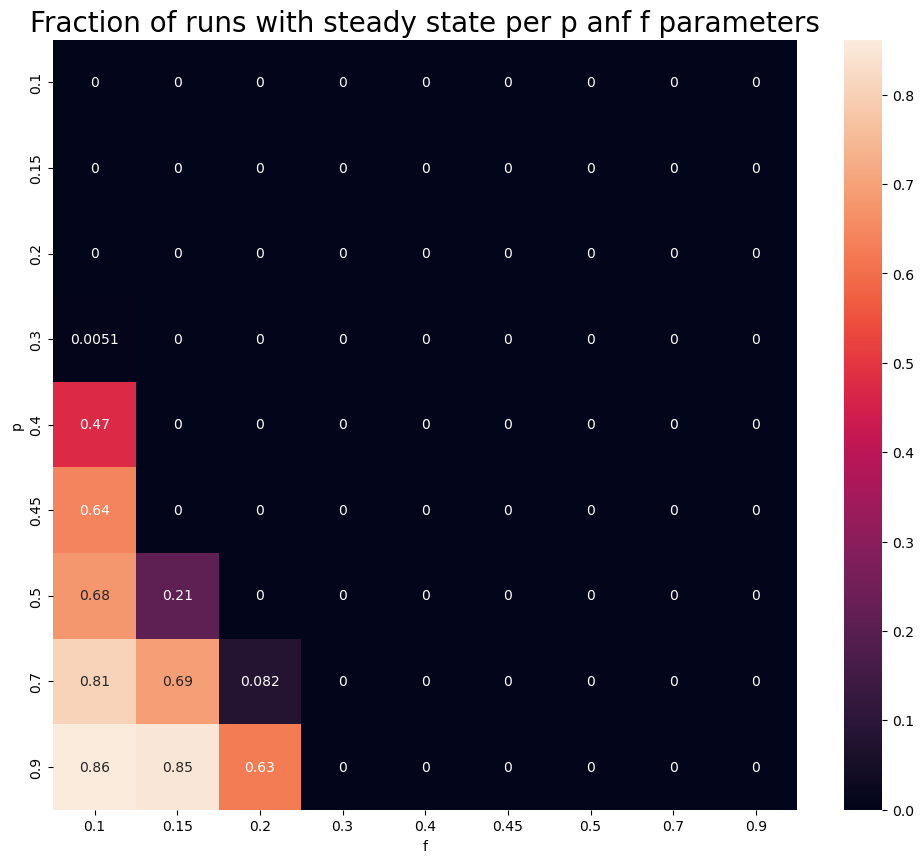

In [5]:
no_rain_df = simulations_results_df[simulations_results_df['r'] == 0]

def show_heat_map(df):
    p_f_map = pd.pivot_table(df, values='is_steady', index=['p'], columns=['f'])
    plt.figure(figsize=(12, 10))
    sns.heatmap(p_f_map, annot=True)
      # plt.show()

show_heat_map(no_rain_df)
plt.title("Fraction of runs with steady state per p anf f parameters", fontsize=20)

Text(0.5, 1.0, 'Chance of steady state as function of grid size')

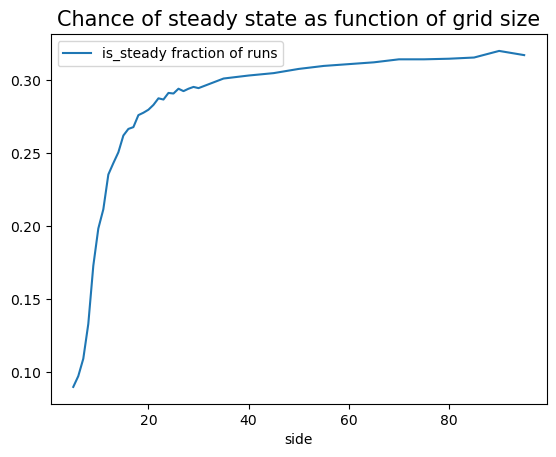

In [6]:
simulations_results_df['side'] = simulations_results_df['grid_size'].map(lambda x: x[1:-1].split(", ")[0]).astype('int')
simulations_results_df.groupby('side')['is_steady'].mean().plot(label='is_steady fraction of runs')
plt.legend()
plt.title("Chance of steady state as function of grid size", fontsize=15)

For simulations with p=0.9, f=0.1 and grid sizes above (12,12) reached steady-state:

In [7]:
no_rain_df[(no_rain_df['f'] == 0.1) & (no_rain_df['p'] == 0.9)].groupby('grid_size').mean().sort_values('is_steady', ascending=False)

,f,p,r,num_states,num_simulations,is_steady,pct_trees,pct_fires
grid_size,,,,,,,,
"(29, 29)",0.1,0.9,0.0,300.0,5.0,1.0,38.732200,29.018400
"(27, 27)",0.1,0.9,0.0,300.0,5.0,1.0,38.848320,28.912400
"(90, 90)",0.1,0.9,0.0,300.0,5.0,1.0,38.395840,29.187320
"(85, 85)",0.1,0.9,0.0,300.0,5.0,1.0,38.397920,29.179560
"(80, 80)",0.1,0.9,0.0,300.0,5.0,1.0,38.447920,29.150040
"(75, 75)",0.1,0.9,0.0,300.0,5.0,1.0,38.380600,29.190560
"(70, 70)",0.1,0.9,0.0,300.0,5.0,1.0,38.318320,29.221280
"(65, 65)",0.1,0.9,0.0,300.0,5.0,1.0,38.429640,29.172400
"(60, 60)",0.1,0.9,0.0,300.0,5.0,1.0,38.588560,29.079120


* Standard deviation of the percentages of fires and trees

In [8]:
no_rain_df.groupby(['grid_size', 'f', 'p']).std().reset_index().sort_values('pct_trees', ascending=False).head(30)

,grid_size,f,p,r,num_states,num_simulations,is_steady,pct_trees,pct_fires
169,"(12, 12)",0.10,0.70,0.0,0.0,0.0,0.547723,1.531876,0.471923
332,"(14, 14)",0.10,0.90,0.0,0.0,0.0,0.000000,1.020548,0.543795
494,"(16, 16)",0.10,0.90,0.0,0.0,0.0,0.000000,0.847529,0.386635
575,"(17, 17)",0.10,0.90,0.0,0.0,0.0,0.000000,0.729293,0.387769
664,"(18, 18)",0.15,0.70,0.0,0.0,0.0,0.447214,0.728410,0.382959
250,"(13, 13)",0.10,0.70,0.0,0.0,0.0,0.447214,0.727861,0.204676
413,"(15, 15)",0.10,0.90,0.0,0.0,0.0,0.000000,0.670373,0.303645
251,"(13, 13)",0.10,0.90,0.0,0.0,0.0,0.000000,0.643052,0.390830
8,"(10, 10)",0.10,0.90,0.0,0.0,0.0,0.447214,0.635898,0.324294
331,"(14, 14)",0.10,0.70,0.0,0.0,0.0,0.447214,0.634463,0.271979


#### Extended model with additional rule

* Heat map visualisation for r=1 and r=0.5

Text(0.5, 1.0, 'r = 0.5 - fraction of runs with steady state per p anf f parameters')

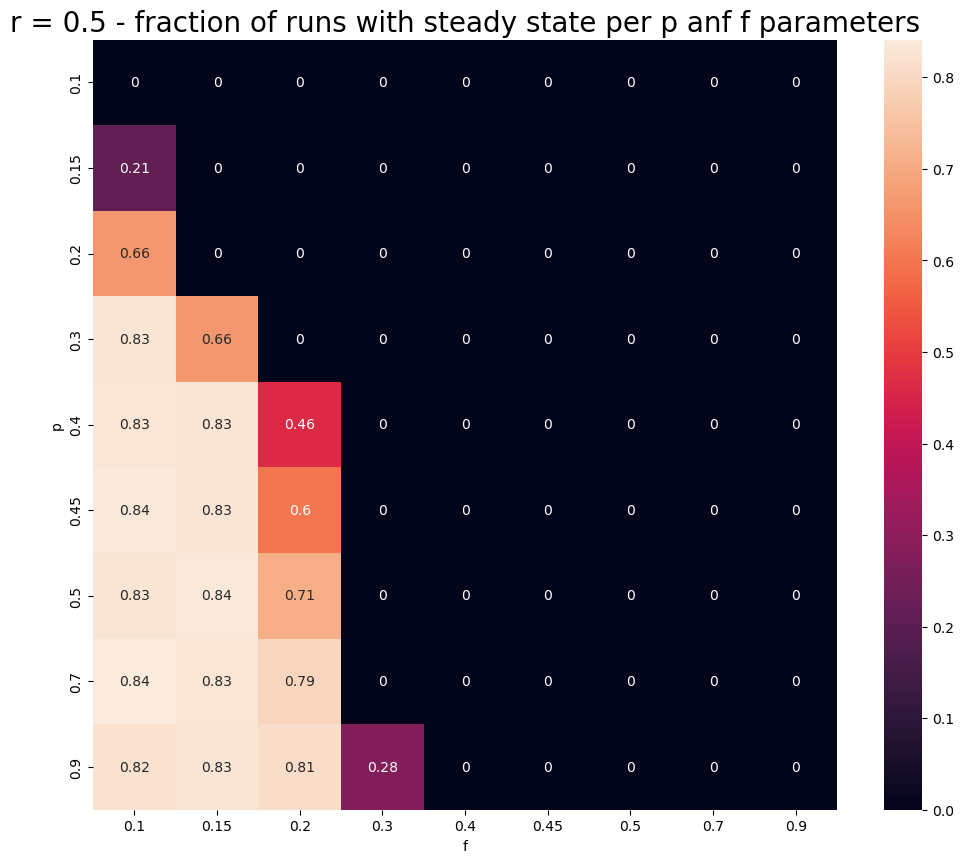

In [9]:
r_df = simulations_results_df[simulations_results_df['r'] == 0.5]
show_heat_map(r_df)
plt.title(f"r = 0.5 - fraction of runs with steady state per p anf f parameters", fontsize=20)

Text(0.5, 1.0, 'r = 1 - fraction of runs with steady state per p anf f parameters')

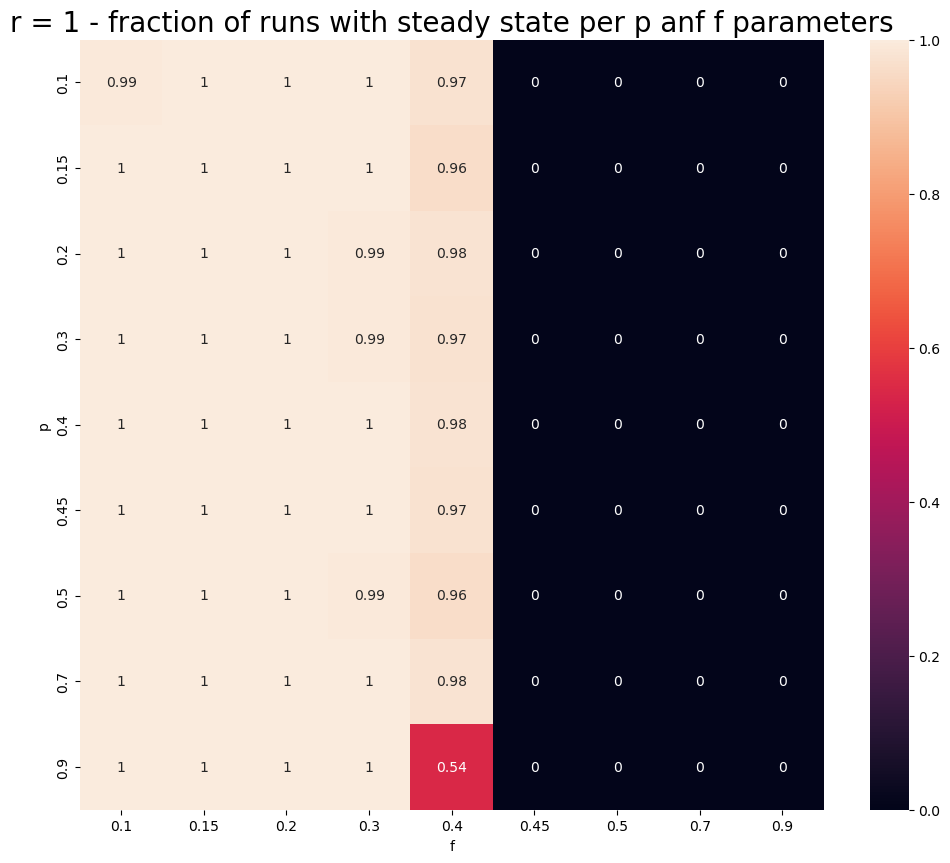

In [10]:
r_df = simulations_results_df[simulations_results_df['r'] == 1]
show_heat_map(r_df)
plt.title(f"r = 1 - fraction of runs with steady state per p anf f parameters", fontsize=20)

*  The probability of reaching a steady-state as a function of grid size

Text(0, 0.5, 'probability')

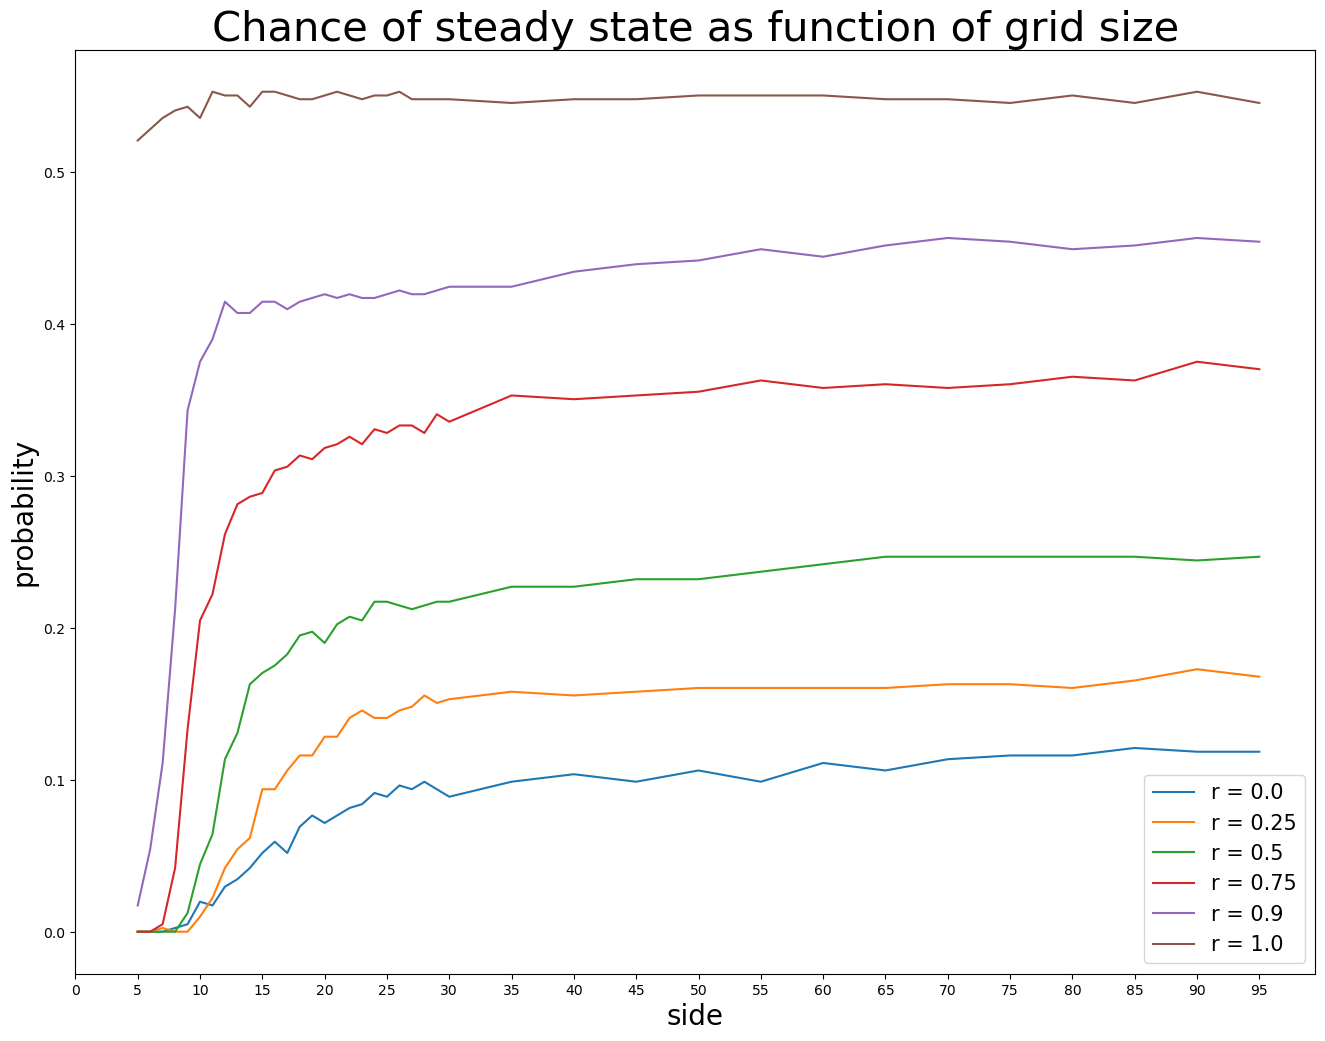

In [72]:
rs = sorted(simulations_results_df['r'].unique().tolist())
plt.figure(figsize=(16, 12))
for r in rs:
  r_df = simulations_results_df[simulations_results_df['r'] == r]
  r_df.groupby('side')['is_steady'].mean().plot(label=f'r = {r}')
plt.xticks(range(0, 100, 5))
plt.legend(fontsize=15)
plt.title(f"Chance of steady state as function of grid size", fontsize=30)
plt.xlabel("side", fontsize=20)  # Set x-axis label font size
plt.ylabel("probability", fontsize=20)  # Set y-axis label font size